# 参考资料
## 2023.5.26
* @ github.com/yaofanghao
* **官方API说明文档**
  * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
* **matplotlib说明文档** 
  * 参考的绘图格式，非常丰富详细，可以自定义各种图表样式
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
* https://www.bilibili.com/video/BV1eR4y1B7fn

# 1 预处理
* 格式参考test.xlsx
* 需要有原始分数三列、标签矩阵三列、类别矩阵一列

In [91]:
import numpy as np
import pandas as pd          


data_name = 'test-waibu'

excel_file = data_name + '.xlsx'     # test-neibu.txt 对应 5.17模型-5.5内部测试集-新计算方法结果-内部测试集.xlsx
df = pd.read_excel(excel_file)

* P概率值矩阵 m行3列 来源于原始分数三列

In [92]:
df.drop(df.index[[0]])  # 删除第一行
P = df.iloc[:,[1,2,3]]  #第1到第3列
P = np.array(P)
print(P.shape)
P

(751, 3)


array([[2.30160e-02, 2.30050e-02, 9.65486e-01],
       [4.86258e-01, 4.13732e-01, 0.00000e+00],
       [3.91184e-01, 5.08811e-01, 0.00000e+00],
       ...,
       [4.17999e-01, 4.81974e-01, 0.00000e+00],
       [9.33000e-04, 9.98599e-01, 9.34000e-04],
       [0.00000e+00, 4.93650e-01, 4.06354e-01]])

* L矩阵 m行3列 来源于标签矩阵三列

In [93]:
L = df.iloc[:,[5,6,7]]
L = np.array(L)
print(L.shape)
L

(751, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

* label矩阵 m行1列 来源于类别矩阵一列

In [94]:
# label矩阵
label = df.iloc[:,[8]]
label = np.array(label)
label = label.ravel()
print(label.shape)
label

(751,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# 2 绘制每一个类别的ROC曲线

In [95]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import matplotlib;matplotlib.rc("font",family='Microsoft YaHei')

## 2.1 分别画单个类别的ROC曲线
* **以0-1分为例**
* label_class0 标签值，是一维数组，如果实际图片为0-1分，该值为1，否则为-1
* score 概率值，是一维数组，为对应图片0-1分的预测分数

In [96]:
label_class0 = []
score = []
for i in label:
    if i == 0:
        label_class0.append(1)
    else:
        label_class0.append(-1)
score = [P[i,0] for i in range(P.shape[0])]

In [97]:
print(label_class0)
print(score)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

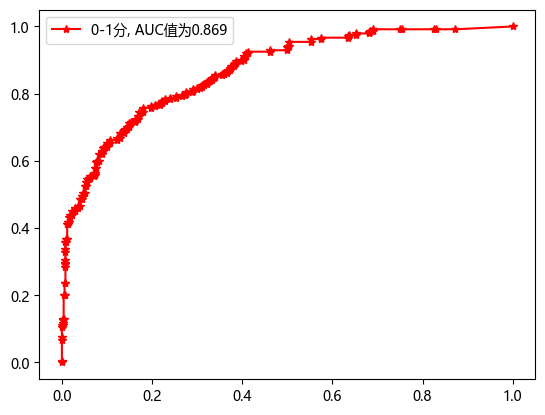

In [98]:
fpr, tpr, threshold = roc_curve(label_class0, score)
auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '*-', color='red', label='0-1分, AUC值为'+str('%.3f'%auc_result))  
plt.legend(); plt.show()

## 2.2 单个类别的ROC曲线画在同一张图
* 参考2.1 在外面加个循环即可

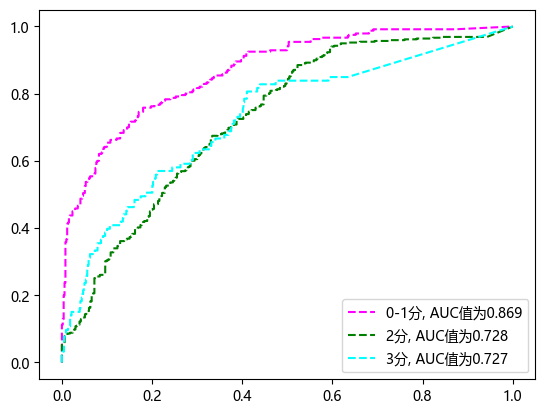

In [99]:
colors = ['magenta','green','cyan'] # 设置三条ROC曲线的颜色
num_classes = ['0-1分','2分','3分']
for j in range(len(num_classes)): # 循环三次
    label_class = []
    score = []
    for i in label:
        if i == j:
            label_class.append(1)
        else:
            label_class.append(-1)
    score = [P[i,j] for i in range(P.shape[0])]
    fpr, tpr, threshold = roc_curve(label_class, score)
    auc_result = auc(fpr, tpr)
    plt.plot(fpr, tpr, '--', color=colors[j], label=num_classes[j] + ', AUC值为' + str('%.3f'%auc_result)) 
plt.legend(); plt.show()

# 3 微平均法绘制总体ROC曲线
* 需要用到第1步预处理中的L矩阵，这个矩阵的特点m行3列，全由0或1组成

In [100]:
print(L.shape)
L

(751, 3)


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=int64)

In [101]:
P

array([[2.30160e-02, 2.30050e-02, 9.65486e-01],
       [4.86258e-01, 4.13732e-01, 0.00000e+00],
       [3.91184e-01, 5.08811e-01, 0.00000e+00],
       ...,
       [4.17999e-01, 4.81974e-01, 0.00000e+00],
       [9.33000e-04, 9.98599e-01, 9.34000e-04],
       [0.00000e+00, 4.93650e-01, 4.06354e-01]])

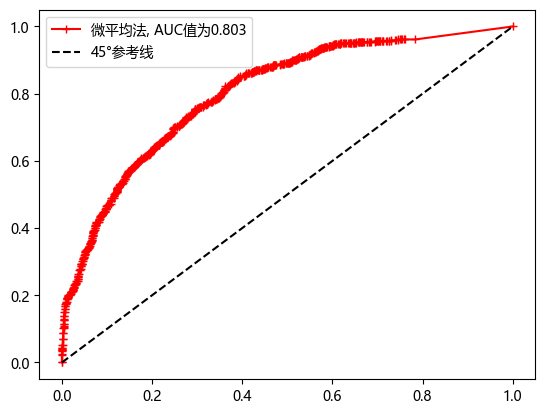

In [102]:
for i in range(P.shape[0]):
    fpr, tpr, threshold = roc_curve(L.ravel(),P.ravel())
    auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '+-', color='red', label='微平均法, AUC值为' + str('%.3f'%auc_result)) 
plt.plot([0,1],[0,1],'--', color='black', label='45°参考线')
plt.legend();plt.show()

# 3-2 宏平均法 --6.13测试-可能不准确

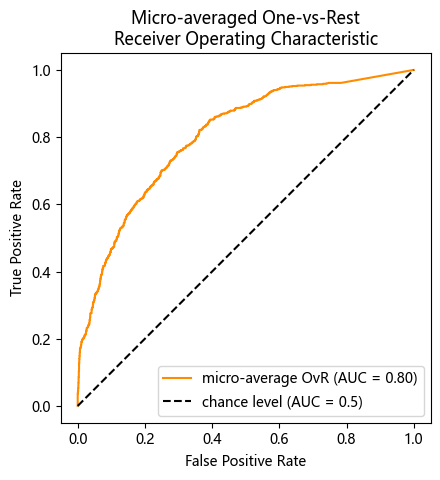

In [103]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    L.ravel(),
    P.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

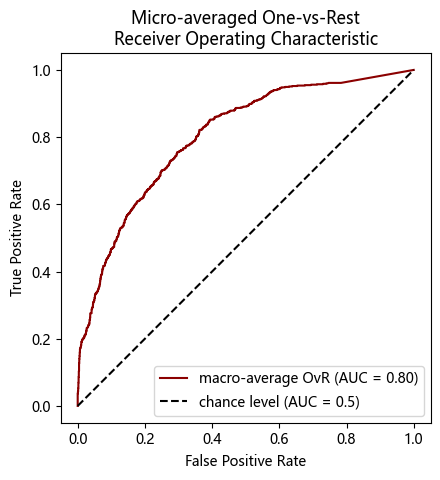

In [104]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    L.ravel(),
    P.ravel(),
    name="macro-average OvR",
    color="darkred",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [105]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    L.ravel(),
    P.ravel(),
    multi_class="ovr",
    average="micro",
)

print("Micro-averaged One-vs-Rest ROC AUC score:{}".format(micro_roc_auc_ovr))

Micro-averaged One-vs-Rest ROC AUC score:0.8030180797551777


In [106]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovr = roc_auc_score(
    L.ravel(),
    P.ravel(),
    multi_class="ovr",
    average="macro",
)

print("Micro-averaged One-vs-Rest ROC AUC score:{}".format(macro_roc_auc_ovr))

Micro-averaged One-vs-Rest ROC AUC score:0.8030180797551777


# 4 把所有ROC画在一起

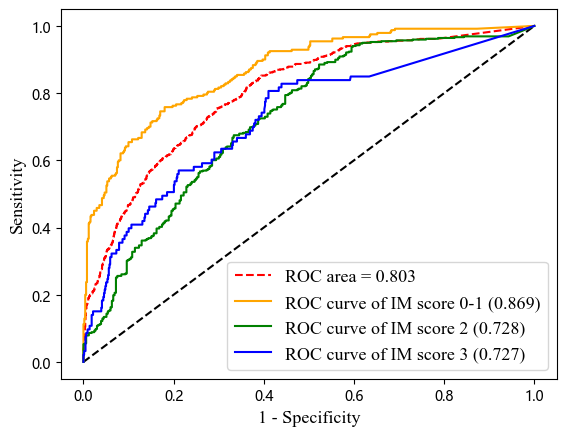

In [107]:
# colors = ['magenta','green','cyan'] # 设置三条ROC曲线的颜色
# num_classes = ['0-1分','2分','3分']
# for j in range(len(num_classes)): # 循环三次
#     label_class = []
#     score = []
#     for i in label:
#         if i == j:
#             label_class.append(1)
#         else:
#             label_class.append(-1)
#     score = [P[i,j] for i in range(P.shape[0])]
#     fpr, tpr, threshold = roc_curve(label_class, score)
#     auc_result = auc(fpr, tpr)
#     plt.plot(fpr, tpr, 'x-', color=colors[j], label=num_classes[j] + ', AUC值为' + str('%.3f'%auc_result)) 
# plt.legend();

# for i in range(P.shape[0]):
#     fpr, tpr, threshold = roc_curve(L.ravel(),P.ravel())
#     auc_result = auc(fpr, tpr)
# plt.plot(fpr, tpr, 'x-', color='red', label='微平均法, AUC值为' + str('%.3f'%auc_result)) 
# plt.plot([0,1],[0,1],'--', color='black', label='45°参考线')
# plt.title('ROC result')
# plt.legend();plt.show()

# 2023.7.25 精修版
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

colors = ['orange','green','blue'] # 设置三条ROC曲线的颜色
font_times = FontProperties(family='Times New Roman', size=13)
font_xylabel ={'family' : 'Times New Roman', 'size'   : 13}

for i in range(P.shape[0]):
    fpr, tpr, threshold = roc_curve(L.ravel(),P.ravel())
    auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '--', color='red', label='ROC area = ' + str('%.3f'%auc_result)) 
plt.plot([0,1],[0,1],'--', color='black')
# plt.title('ROC result')
plt.legend(loc='lower right', prop=font_times);

label_class = []
score = []
for i in label:
    if i == 0:
        label_class.append(1)
    else:
        label_class.append(-1)
score = [P[i,0] for i in range(P.shape[0])]
fpr, tpr, threshold = roc_curve(label_class, score)
auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '-', color=colors[0], label='ROC curve of IM score 0-1 (' + (str('%.3f'%auc_result) + ')') )
plt.legend(loc='lower right', prop=font_times);

label_class = []
score = []
for i in label:
    if i == 1:
        label_class.append(1)
    else:
        label_class.append(-1)
score = [P[i,1] for i in range(P.shape[0])]
fpr, tpr, threshold = roc_curve(label_class, score)
auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '-', color=colors[1], label='ROC curve of IM score 2 (' + (str('%.3f'%auc_result) + ')') )
plt.legend(loc='lower right', prop=font_times);

label_class = []
score = []
for i in label:
    if i == 2:
        label_class.append(1)
    else:
        label_class.append(-1)
score = [P[i,2] for i in range(P.shape[0])]
fpr, tpr, threshold = roc_curve(label_class, score)
auc_result = auc(fpr, tpr)
plt.plot(fpr, tpr, '-', color=colors[2], label='ROC curve of IM score 3 (' + (str('%.3f'%auc_result) + ')') )
plt.legend(loc='lower right', prop=font_times);

plt.xlabel("1 - Specificity", fontdict=font_xylabel)
plt.ylabel("Sensitivity", fontdict=font_xylabel)


plt.savefig(data_name+'.png', format='png', dpi=500)
plt.savefig(data_name+'.tif', format='tif', dpi=500)

plt.show()


ROCarca=0.871
ROC curve of IM score 0-1 (0.954)
ROC curve of IM score 2 (0.806)
ROC curve of IM score 3 (0.746)